In [1]:
import numpy as np
import os
import cv2 
from tensorflow.keras.models import model_from_json
import time
import threading


In [2]:
json_file = open('Models/smally_rack_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Models/smally_rack_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [4]:
cv2.__version__


'4.2.0'

In [5]:
r1 = (150, 368, 63, 41)
r2 = (40, 327, 61, 33)

In [29]:
cap = cv2.VideoCapture('Videos/rack.mp4') 
isRegionSelected = 1
count = 0
p1_change = False
p2_change = False
font = cv2.FONT_HERSHEY_SIMPLEX 
while(True): 
      
    # Capture frames in the video 
    ret, frame = cap.read() 
    frame1 = cv2.cvtColor(np.copy(frame), cv2.COLOR_BGR2RGB)
    if (isRegionSelected == 0):
        # Select ROI
        r1 = cv2.selectROI(frame)
        r2= cv2.selectROI(frame)
        # Crop image
        imCrop1 = frame[int(r1[1]):int(r1[1]+r1[3]), int(r1[0]):int(r1[0]+r1[2])]
        imCrop2 = frame[int(r2[1]):int(r2[1]+r2[3]), int(r2[0]):int(r2[0]+r2[2])]
        #############################################################################
        
        # Crop image
        
        isRegionSelected = 1

  
    imCrop1 = frame1[int(r1[1]):int(r1[1]+r1[3]), int(r1[0]):int(r1[0]+r1[2])]
    imCrop2 = frame1[int(r2[1]):int(r2[1]+r2[3]), int(r2[0]):int(r2[0]+r2[2])]
    frame = cv2.rectangle(frame,
                          (int(r1[0]),int(r1[1])),
                          (int(r1[0] +r1[2]),int(r1[1]+r1[3])),
                          (255, 0, 0), 2
                         )
                          
    frame = cv2.rectangle(frame,
                          (int(r2[0]),int(r2[1])), 
                          (int(r2[0] + r2[2]),int(r2[1]+ r2[3])),
                          (0, 255, 255), 2
                          )
    img1 = np.copy(imCrop1)
    img2 = np.copy(imCrop2)
    
    #img = img/255.0
    img1 = np.expand_dims(cv2.resize(img1/255.0, (64,64)), axis = 0)
    img2 = np.expand_dims(cv2.resize(img2/255.0, (64,64)), axis = 0)
    
    #print(img.shape)
    p1 = loaded_model.predict(img1)
    p2 = loaded_model.predict(img2)
    #print(pred)
    #p = pred
    #print()
    change_check = 0
    
    
    font = cv2.FONT_HERSHEY_SIMPLEX 
    ############################################################################
    
    
    if (p1>0.85):# describe the type of font 
        # to be used. 
        font = cv2.FONT_HERSHEY_SIMPLEX 
  
        # Use putText() method for 
        # inserting text on video 
        cv2.putText(frame,  
                    'No Rack detected at p1 {}'.format(p1),  
                    (100, 100),  
                    font, 0.5,  
                    (0, 255, 255),  
                    2,  
                    cv2.LINE_4)
        check_change = 0
         
    elif( p1<0.2):
                # to be used. 
        font = cv2.FONT_HERSHEY_SIMPLEX 
  
        # Use putText() method for 
        # inserting text on video 
        cv2.putText(frame,  
                    'Rack detected at p1 \n.{}'. format(p1),  
                    (100, 100),  
                    font, 0.5,  
                    (0, 255, 255),  
                    2,  
                    cv2.LINE_4)
        p1_change = True
    else:
            cv2.putText(frame,  
                    'Rack detected at p2\n.{}'. format(p2),  
                    (100, 100),  
                    font, 0.5,  
                    (0, 255, 255),  
                    2,  
                    cv2.LINE_4)
        
    #################################################################################    
    
    if (p2>0.85):# describe the type of font 
        # to be used. 
        font = cv2.FONT_HERSHEY_SIMPLEX 
  
        # Use putText() method for 
        # inserting text on video 
        cv2.putText(frame,  
                    'No Rack detected at p2 {}'.format(p2),  
                    (50, 50),  
                    font, 0.5,  
                    (0, 255, 255),  
                    2,  
                    cv2.LINE_4)
        check_change = 0
         
    elif( p2<0.2):
        # to be used. 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        p2_change =True
        # Use putText() method for 
        # inserting text on video 
        cv2.putText(frame,  
                    'Rack detected at p2\n.{}'. format(p2),  
                    (50, 50),  
                    font, 0.5,  
                    (0, 255, 255),  
                    2,  
                    cv2.LINE_4)
    else:
        cv2.putText(frame,  
                'Rack detected at p2\n.{}'. format(p2),  
                (50, 50),  
                font, 0.5,  
                (0, 255, 255),  
                2,  
                cv2.LINE_4)

    #####################################################################################
    
    if((p1_change == True) and (p2_change == True)):
        p1_change = False
        p2_change = False
        count = count +1 
        
    
    
    font = cv2.FONT_HERSHEY_SIMPLEX 

    # Use putText() method for 
    # inserting text on video 
    cv2.putText(frame,  
                'Racks counted {}'. format(count),  
                (170, 170),  
                font, 0.5,  
                (0, 255, 255),  
                2,  
                cv2.LINE_4)
    # Display the resulting frame 
    cv2.imshow('video', frame) 
  
    # creating 'q' as the quit  
    # button for the video 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
# release the cap object 
cap.release() 
# close all windows 
cv2.destroyAllWindows() 

In [8]:
cv2.destroyAllWindows()

In [18]:
img1

array([], shape=(0, 0, 3), dtype=uint8)

In [12]:
r1

(145, 389, 53, 32)

In [19]:
frame.shape

(720, 1280, 3)

In [7]:
img1.shape

(1, 64, 64, 3)

In [24]:
img2[0].shape

(64, 64, 3)

In [25]:
image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

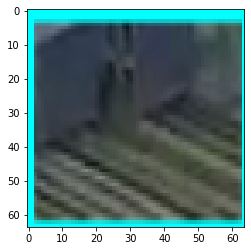

In [19]:
import matplotlib.pyplot as plt
plt.imshow(img2[0])

In [26]:
frame.shape

(720, 1280, 3)